# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
!pip install tomotopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 26.3 MB/s eta 0:00:00


In [2]:
!pip install little_mallet_wrapper

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [17]:
# Q2 (code)
sanders = pd.read_csv('/content/drive/MyDrive/Assignment3/sanders_tweets.csv', encoding="UTF-8")
trump = pd.read_csv('/content/drive/MyDrive/Assignment3/trump_tweets.csv', encoding="UTF-8")
tweets = pd.concat([sanders, trump])

In [18]:
tweets.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [38]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    processed_text = text.lower()
    # Remove URLs and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+", '', processed_text, flags=re.MULTILINE)
    # Remove punctuation
    processed_text = processed_text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    processed_text = re.sub(r'\d+', '', processed_text)
    # Tokenize the text
    words = processed_text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    # Join the filtered words back into a string
    processed_text = ' '.join(filtered_words)

    return processed_text

training_data = []
original_texts = []
titles = []

for index, row in tweets.iterrows():
    # Preprocess the tweet text
    processed_text = preprocess_text(row['Content'])
    # Add the processed text to the 'training_data' list
    training_data.append(processed_text)
    # Add the original text to the 'original_texts' list
    original_texts.append(row['Content'])
    # Create the title by combining 'Username' and 'TweetId'
    title = row['Username'] + '_' + str(row['TweetId'])
    # Add the title to the 'titles' list
    titles.append(title)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [39]:
# Q4 (code)
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.279081418791733
Iteration: 10	Log-likelihood: -8.935834276427087
Iteration: 20	Log-likelihood: -8.761406790202107
Iteration: 30	Log-likelihood: -8.677353905051827
Iteration: 40	Log-likelihood: -8.623763531646908
Iteration: 50	Log-likelihood: -8.590196391465941
Iteration: 60	Log-likelihood: -8.56295591783401
Iteration: 70	Log-likelihood: -8.541653386755643
Iteration: 80	Log-likelihood: -8.52522969906609
Iteration: 90	Log-likelihood: -8.515096008765912


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [40]:
# Q5a (code)
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

us border must united states wall war security amp country

✨Topic 1✨

rt democrats president trump biden joe impeachment election want vote

✨Topic 2✨

rt president great trump thank today house pm live white

✨Topic 3✨

people health care must americans need right american social trump

✨Topic 4✨

great thank amp vote state job total big endorsement military

✨Topic 5✨

tax billion workers million pay people americans wage year health

✨Topic 6✨

news rt fake amp media trump fbi russia never witch

✨Topic 7✨

rt people american america country united president states today us

✨Topic 8✨

change drug climate energy must jobs prices industry fossil companies

✨Topic 9✨

great amp china many big much us good years would



In [1]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

Topic 1:
This topic seems to be about the discussion surrounding the potential impeachment of Democratic President Joe Biden, which could influence the upcoming election.

Topic 2:
This topic appears to highlight expressions of appreciation directed towards President Trump. Words like 'great' and 'thank' convey positive sentiments associated with the Trump administration.

Topic 3:
This topic revolves around the American healthcare system, indicating debates about social welfare, healthcare reform, and possibly evaluations of the healthcare policies under the Trump administration.

Topic 4:
It seems this topic involves expressions of gratitude and support, potentially related to political endorsements, job creation efforts, and military affairs.

Topic 5:
This topic delves into economic issues like taxes, wages, and healthcare expenses affecting the American people.

Topic 6:
This topic may express Trump's criticism of the media. Trump often accuses the media of reporting fake news. It may also involve Trump denying news accusing him of being a Russian spy.

Topic 7:
This topic encompasses discussions about the United States, its citizens, and its leadership in contemporary America.

Topic 8:
It centers on climate change, energy policies, and job creation, suggesting conversations about the imperative to address climate change, transition to renewable energy sources, and the economic implications for industries like fossil fuels.

Topic 9:
This topic involves discussions about the relationship between the United States and China, likely concentrating on trade, diplomacy, and economic competition, reflecting on how China's influence affects various aspects of American life and policy.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [41]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5675397115945816 
Per Topic: [0.49739364087581633, 0.5507451057434082, 0.5224662780761719, 0.5698736146092415, 0.6360082387924194, 0.6710641905665398, 0.6474714398384094, 0.4152626395225525, 0.6264179706573486, 0.5386939972639084]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)

At first, I used 10 topics to train the model, and the coherence score was 0.5675397115945816. Then, I changed the topic numbers to 12, 15, 18, and 20. The results showed that when the number was 18, the coherence score was the highest. Additionally, I experimented with topic numbers 16 and 17 to determine if a higher score could be achieved, but it still showed that when the topic number was 18, the score remained the highest.

Here are the results:\
num_topics = 12\
Average: 0.5382826591531437\
Per Topic: [0.5434438958764076, 0.46296038925647737, 0.6359363049268723, 0.37730161249637606, 0.5926398783922195, 0.5299732372164726, 0.6709569811820983, 0.49387408792972565, 0.473545303940773, 0.4753555923700333, 0.5907745033502578, 0.6126301229000092]

num_topics = 15\
Average: 0.563926697820425\
Per Topic: [0.5854494631290436, 0.4957420155405998, 0.5098819971084595, 0.5620573222637176, 0.5100557178258895, 0.5135257966816426, 0.6340449556708336, 0.573055899143219, 0.5664067208766937, 0.6697986632585525, 0.5654565632343292, 0.7431251704692841, 0.5640303805470467, 0.5184179216623306, 0.4478518798947334]

num_topics = 16\
Average: 0.5581340508069843\
Per Topic: [0.6604981064796448, 0.7361252158880234, 0.5826265126466751, 0.56275674700737, 0.5030021637678146, 0.6325737431645393, 0.533595123142004, 0.38798399865627287, 0.5280607879161835, 0.523017929494381, 0.515559709072113, 0.4884758174419403, 0.454295913875103, 0.6216505885124206, 0.7356741547584533, 0.46424830108881]

num_topics = 17\
Average: 0.5412883113850564\
Per Topic: [0.6437045440077782, 0.5710128515958786, 0.5119564428925514, 0.6381175369024277, 0.6067339569330216, 0.5622521683573722, 0.4882760137319565, 0.5655699856579304, 0.7017888396978378, 0.46239377111196517, 0.5349876046180725, 0.4275940418243408, 0.5513169080018997, 0.48913816213607786, 0.4790239781141281, 0.526965719461441, 0.44106876850128174]

num_topics = 18\
Average: 0.5817361653265025\
Per Topic: [0.5239643283188343, 0.5428929835557937, 0.5773426726460457, 0.48951524794101714, 0.7354543268680572, 0.5584970742464066, 0.6521892622113228, 0.5509186893701553, 0.6270569398999214, 0.5285389095544815, 0.7175520092248917, 0.5046052947640419, 0.5596760734915733, 0.519478303194046, 0.5978366330265998, 0.5539485573768616, 0.632697707414627, 0.5990859627723694]

num_topics = 19\
Average: 0.5634477856887602\
Per Topic: [0.47545027211308477, 0.5124871790409088, 0.58055789321661, 0.5776792258024216, 0.4648392029106617, 0.6206172615289688, 0.6649510145187378, 0.6651204586029053, 0.6769952028989792, 0.5852965407073498, 0.6548945814371109, 0.5239268913865089, 0.5120174631476402, 0.437380596017465, 0.48976059854030607, 0.6190806299448013, 0.47246609497815373, 0.6086263090372086, 0.5633605122566223]

num_topics = 20\
Average: 0.5634837754815818\
Per Topic: [0.43864849358797076, 0.541430875658989, 0.4847835123538971, 0.6292030572891235, 0.5316612601280213, 0.5030966430902482, 0.5951828226447106, 0.6432106107473373, 0.48929615020751954, 0.6078878164291381, 0.7169702023267746, 0.5921347558498382, 0.5667978882789612, 0.5558163166046143, 0.47680581361055374, 0.6600405246019363, 0.6647097766399384, 0.5876171678304672, 0.46672026962041857, 0.517661552131176]


### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [ ]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [50]:
# Based on the results in Q6, now we use topic numbers = 18 to train the model
# Number of topics to return
num_topics = 18
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -9.471152550017111
Iteration: 10	Log-likelihood: -9.035230859096126
Iteration: 20	Log-likelihood: -8.858907187974985
Iteration: 30	Log-likelihood: -8.755944538194742
Iteration: 40	Log-likelihood: -8.689907674334169
Iteration: 50	Log-likelihood: -8.6435463845285
Iteration: 60	Log-likelihood: -8.611987289432564
Iteration: 70	Log-likelihood: -8.590991520601442
Iteration: 80	Log-likelihood: -8.568784425715364
Iteration: 90	Log-likelihood: -8.552647390277576
✨Topic 0✨

border wall democrats want amp country must security people don’t

✨Topic 1✨

news fake media amp even never people democrats like would

✨Topic 2✨

rt amp president trump today thank happy great first state

✨Topic 3✨

workers pay tax billion wage million people class working americans

✨Topic 4✨

health republicans tax care people bill trump security senate republican

✨Topic 5✨

drug trump us people prices back companies take big years

✨Topic 6✨

rt president american

In [51]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [52]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [83]:
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

border wall democrats want amp country must security people don’t



---


✨  
**Topic Probability**: 0.9165346026420593  
**Document**: @realDonaldTrump_1143114897640873984



✨  
**Topic Probability**: 0.9127465486526489  
**Document**: @realDonaldTrump_991992302267785216



✨  
**Topic Probability**: 0.9040358662605286  
**Document**: @realDonaldTrump_953067477830946816



✨  
**Topic Probability**: 0.9040358662605286  
**Document**: @realDonaldTrump_1008506045373845504



✨  
**Topic Probability**: 0.9026920795440674  
**Document**: @realDonaldTrump_1013014046050832384



✨  
**Topic Probability**: 0.8933930993080139  
**Document**: @realDonaldTrump_1144021236764164096



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)

I tested each topic, but did not include all the results above.\
Topics 1, 2, 6, 8, 9, 12, 13, 15, and 17 only have top tweets by Trump, while all the top tweets under topics 3, 4, 5, 7, and 10 are posted by Sanders. Topics 0 and 16 have five tweets by Trump and one tweet by Sanders, while topics 11 and 14 have five tweets by Sanders and one tweet by Trump. It suggests that those topics have only one politician’s tweets, which may represent that person’s view.\
In my opinion, topics 1, 8, and 12 are representative of Trump because he often mentions fake news, issues about China, and Joe Biden in his tweets. Topics 3, 4, 7, and 10 are representative of Sanders because he supports universal and single-payer healthcare, an ambitious Green New Deal to create jobs addressing climate change. Words such as health, change, climate, and energy are frequently used in discussions about these topics.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [56]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [58]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

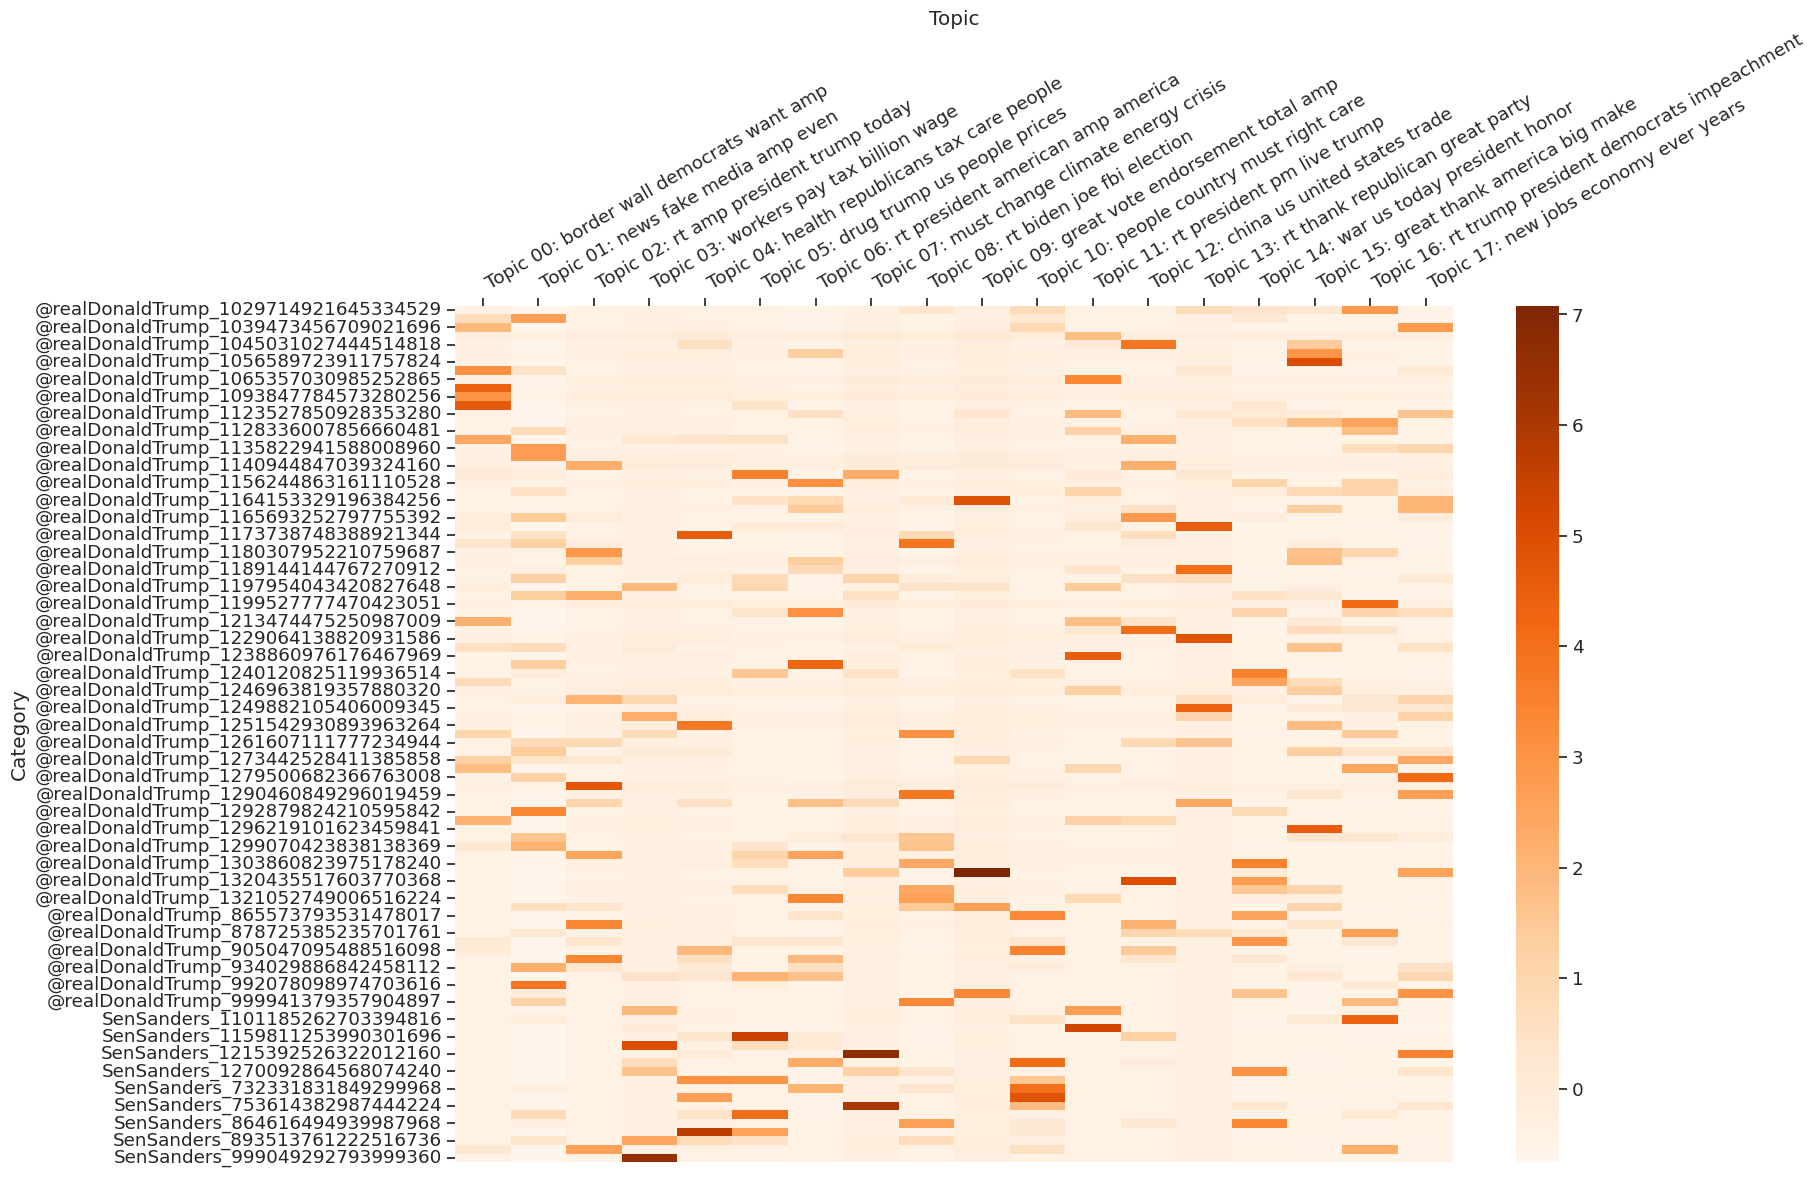

In [65]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Oranges',
                                 dim=(18,12))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

From the heat map, we can observe that the number of Trump's tweets is greater than that of Sanders', possibly indicating Trump's higher frequency of tweeting. Because we randomly selected tweets from the dataset, it may suggest that Trump is more inclined to tweet than Sanders. As discussed in Q7b, the darkest portions of Topics 3, 4, and 7 are concentrated in Sanders' tweets, supporting our prediction that these topics are more associated with Sanders. Regarding Trump, in this map, the darkest portions are in Topic 9, where words like "vote," "endorsement," "total," and "strong" suggest that it pertains to Trump giving his "Complete and Total Endorsement" to Republican allies.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [ ]:
# X2 (code)


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)